# Lazyslide Tutorial

First, let's import the package

In [1]:
%config InlineBackend.figure_format = 'retina'
import lazyslide as zs

We load a example slide from remote, we can take a quick look of what the tissue looks like

<Axes: title={'center': 'sample.svs'}>

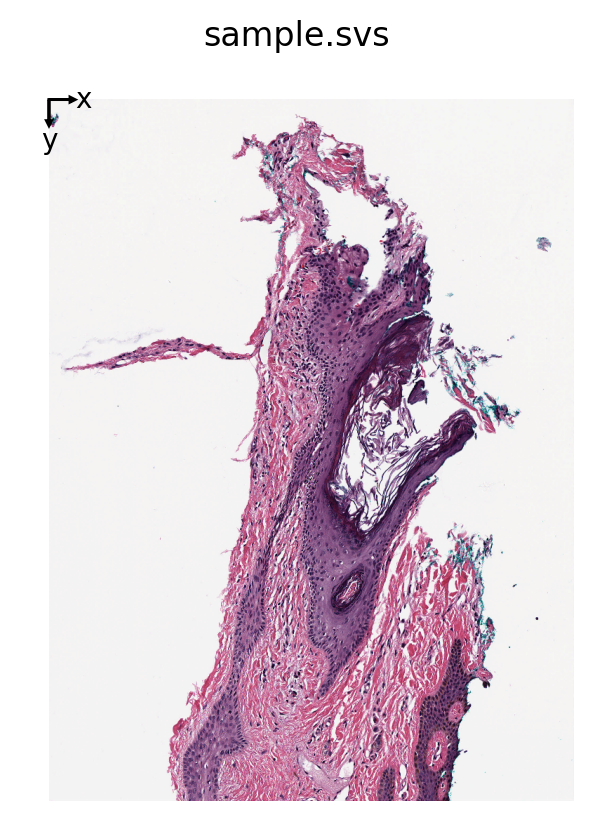

In [2]:
slide = 'https://github.com/camicroscope/Distro/raw/master/images/sample.svs'  # Your SVS file
wsi = zs.WSI(slide)
wsi.plot_tissue()

You can examine the slide information by print the `WSI` object

In [3]:
wsi

WSI Image 2220px * 2967px: /var/folders/6h/dzlbdtr909b4t0tk4ggwdznc0000gp/T/tmpael24_fc/sample.svs
  Levels: 1
  MPP: 0.499
  Magnification: 20X
H5: /var/folders/6h/dzlbdtr909b4t0tk4ggwdznc0000gp/T/tmpael24_fc/sample.h5zs
Reader: openslide

## Tissue segmentation

Before running the tile extration, we need to know the location of the tissue.

You can create a tissue mask

<Axes: >

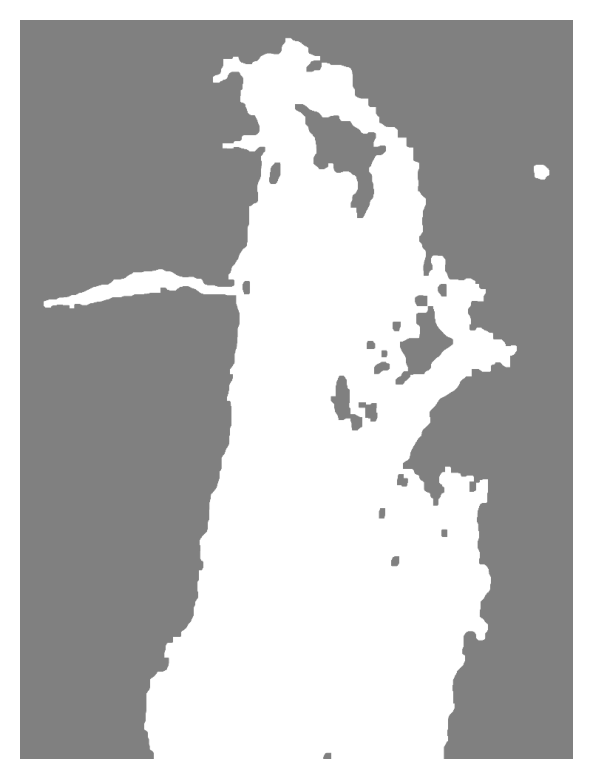

In [4]:
wsi.create_tissue_mask()
wsi.plot_mask()

Alternatively, you can create tissue contours

<Axes: title={'center': 'sample.svs'}>

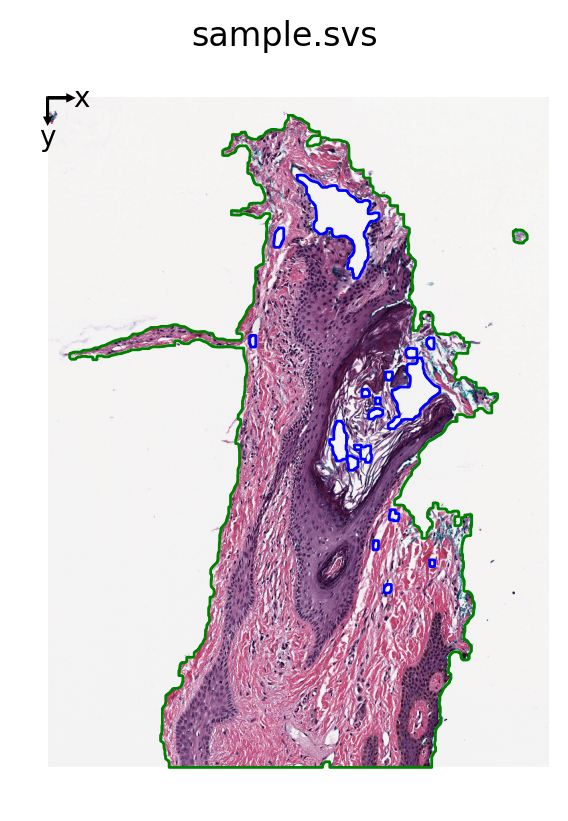

In [5]:
wsi.create_tissue_contours()
wsi.plot_tissue(contours=True)

# Tile extraction

Finally, we can run tile extration

Here, we use a `FocusLiteFilter` model to filter out tiles that are out-of-focus

<Axes: title={'center': 'sample.svs'}>

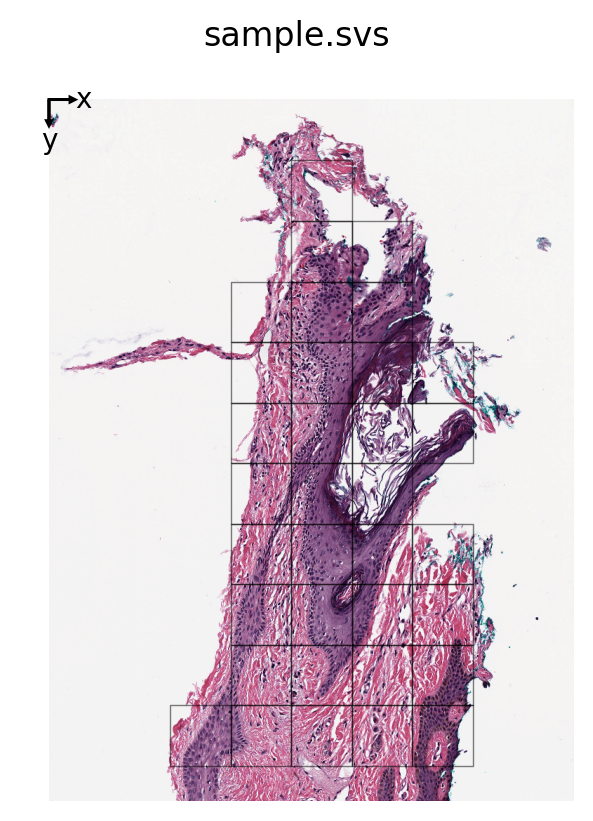

In [6]:
filter = zs.FocusLiteFilter()

wsi.create_tiles(tile_px=256, mpp=.5, tile_filter=filter, background_fraction=0.5)
wsi.plot_tissue(tiles=True)

# Tile information

You can access the tile information as following:

In [7]:
wsi.tile_ops

TileOps(level=0, downsample=1, mpp=0.5, height=256, width=256, ops_height=256, ops_width=256, mask_name=None)

In [8]:
wsi.get_tiles_coords()

array([[ 512, 2560],
       [ 768,  768],
       [ 768, 1024],
       [ 768, 1280],
       [ 768, 1536],
       [ 768, 1792],
       [ 768, 2048],
       [ 768, 2304],
       [ 768, 2560],
       [1024,  256],
       [1024,  512],
       [1024,  768],
       [1024, 1024],
       [1024, 1280],
       [1024, 1536],
       [1024, 1792],
       [1024, 2048],
       [1024, 2304],
       [1024, 2560],
       [1280,  512],
       [1280,  768],
       [1280, 1024],
       [1280, 1280],
       [1280, 1536],
       [1280, 1792],
       [1280, 2048],
       [1280, 2304],
       [1280, 2560],
       [1536, 1024],
       [1536, 1280],
       [1536, 1792],
       [1536, 2048],
       [1536, 2304],
       [1536, 2560]], dtype=uint32)

To get a small patch from slide

In [9]:
img = wsi.get_patch(1024, 256, 256, 256)

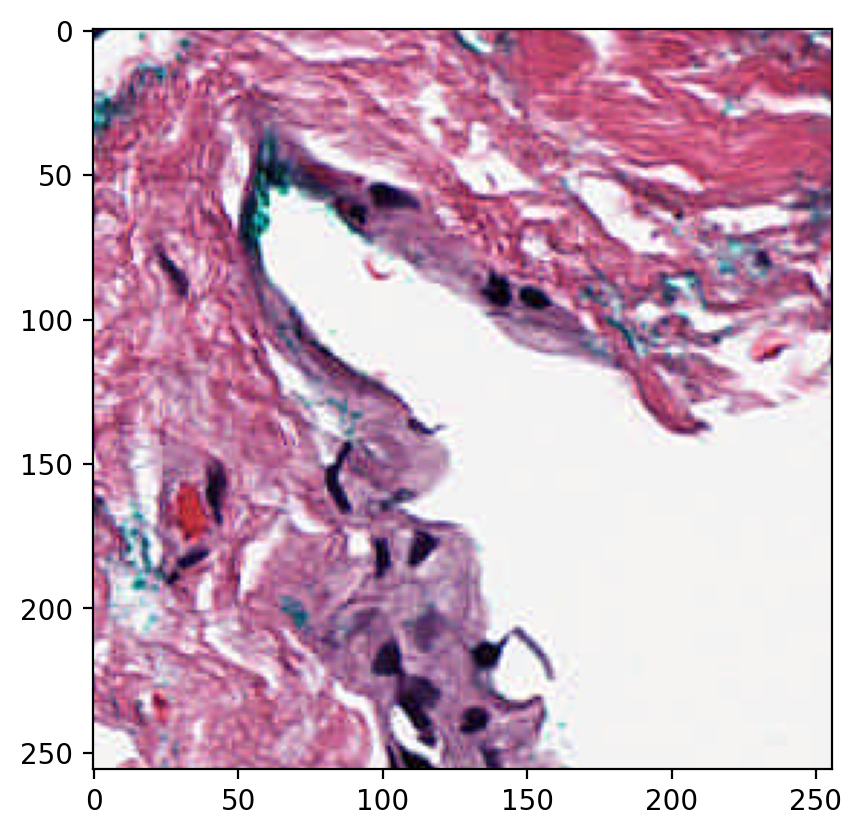

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img)

To confirm the location of the tiles

<Axes: title={'center': 'sample.svs'}>

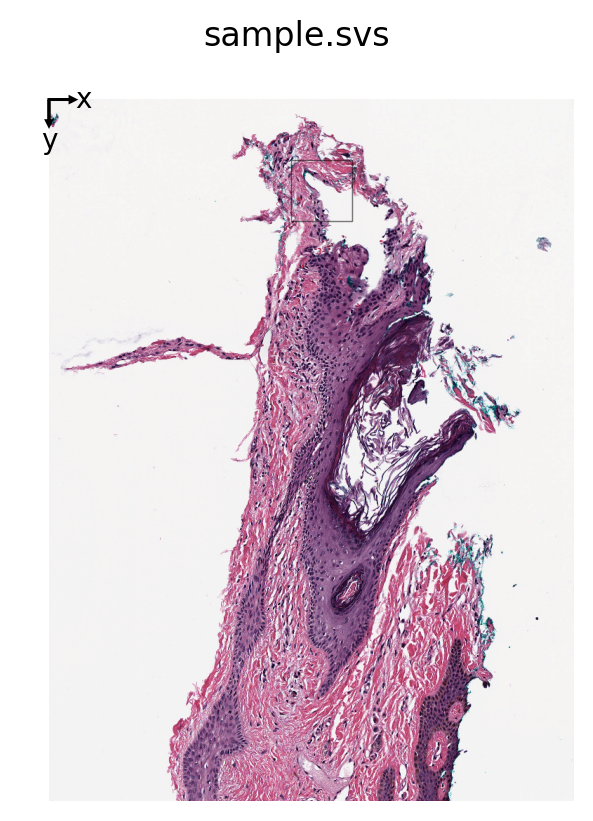

In [11]:
wsi.plot_tissue(tiles=(1024, 256, 256, 256))